In [2]:

!pip install openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick  
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel(r"C:\Users\anany\Downloads\02 Churn-Dataset.xlsx")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [6]:
df.shape

(7043, 23)

In [7]:
unique_counts = df.nunique()
unique_counts

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
numAdminTickets        6
numTechTickets        10
Churn                  2
dtype: int64

In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
numAdminTickets       int64
numTechTickets        int64
Churn                object
dtype: object

##### Changed Dtype for Total Charges from object to float for descriptive stats

In [9]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
numAdminTickets      0
numTechTickets       0
Churn                0
dtype: int64

3. As we can see there are 11 missing values in TotalCharges column. Let's check these records:

In [11]:
missing = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
missing

,index,0
0,customerID,0.000000
1,gender,0.000000
2,SeniorCitizen,0.000000
3,Partner,0.000000
4,Dependents,0.000000
5,tenure,0.000000
6,PhoneService,0.000000
7,MultipleLines,0.000000
8,InternetService,0.000000
9,OnlineSecurity,0.000000


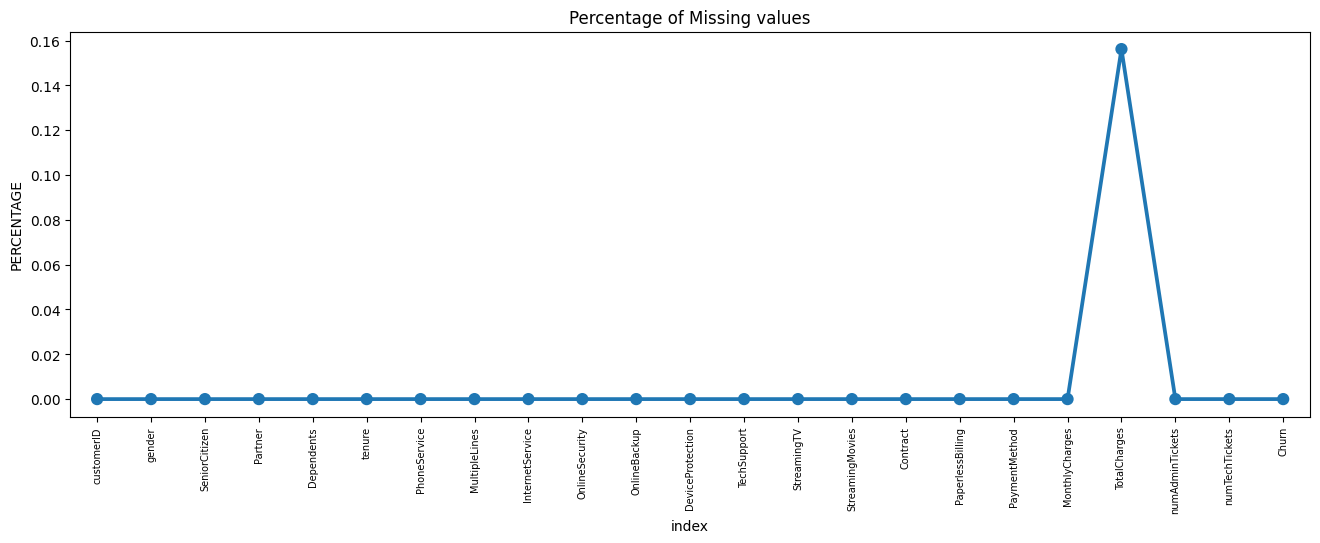

In [12]:
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0, data = missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [13]:
df.loc[df ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0,0,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,5,0,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0,0,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,1,0,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0,0,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0,0,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0,0,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,5,0,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0,0,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,No,Two year,No,Mailed check,73.35,NaN,0,0,No


Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [14]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.515689,0.419566
std,0.368612,24.559481,30.090047,2266.794470,1.275299,1.250117
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,5.000000,9.000000


SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not proper

75% customers have tenure less than 55 months.

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month.

Average Total Charges are USD 2283.30 and 25% customers pay more than than USD 3794.73 yearly.

# Label Encoding for Target Variable

In [16]:
X=df.drop(["Churn"],axis='columns')
y=df.Churn
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [17]:
df['Churn'] = df['Churn'].replace('No', 0)
df['Churn'] = df['Churn'].replace('Yes', 1)
df.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

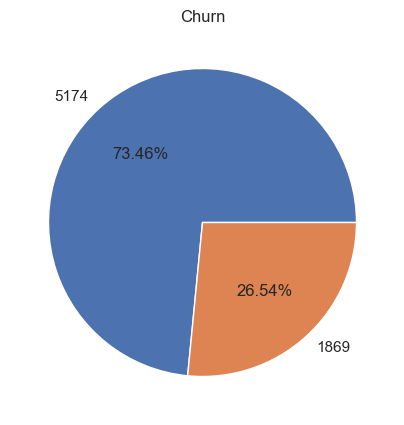

In [18]:
Churn_ratio = df.Churn.value_counts().values
fig = plt.figure(figsize =(5, 5))
sns.set_theme(style="dark")
plt.pie(Churn_ratio,labels = Churn_ratio,autopct = '%1.2f%%')
plt.title("Churn")
plt.show()

##### Observation: Data is imbalanced. Churn rate is 26.54%.

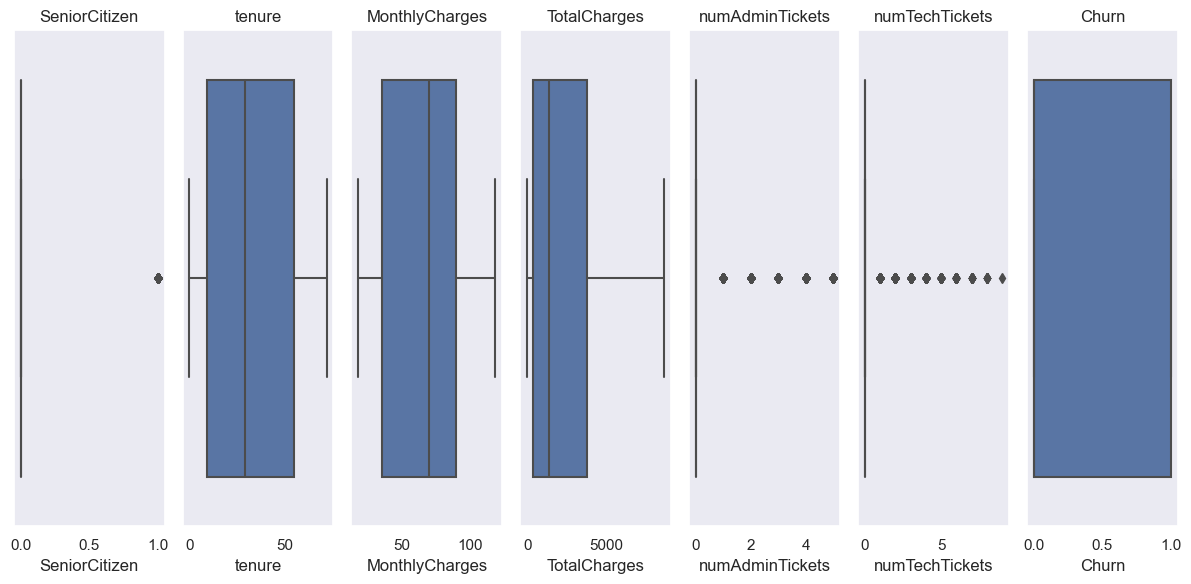

In [19]:
plt.figure(figsize=(12, 6))
for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
    plt.subplot(1, len(df.select_dtypes(include=[np.number]).columns), i + 1)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Few outliers in NumAdminTickets and NumTechTickets features , but for now we will keep them.

 ### Dividing customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24

In [20]:
print(df['tenure'].max()) 

72


In [21]:
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]
df['tenure_group'] = pd.cut(df.tenure, range(1, 80, 12), right=False, labels=labels)

In [22]:
df['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

In [23]:
#drop column customerID and tenure
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,...,No,One year,No,Mailed check,56.95,1889.50,0,0,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,1,1 - 12


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

### DATA EXPLORATION

#### Univariate

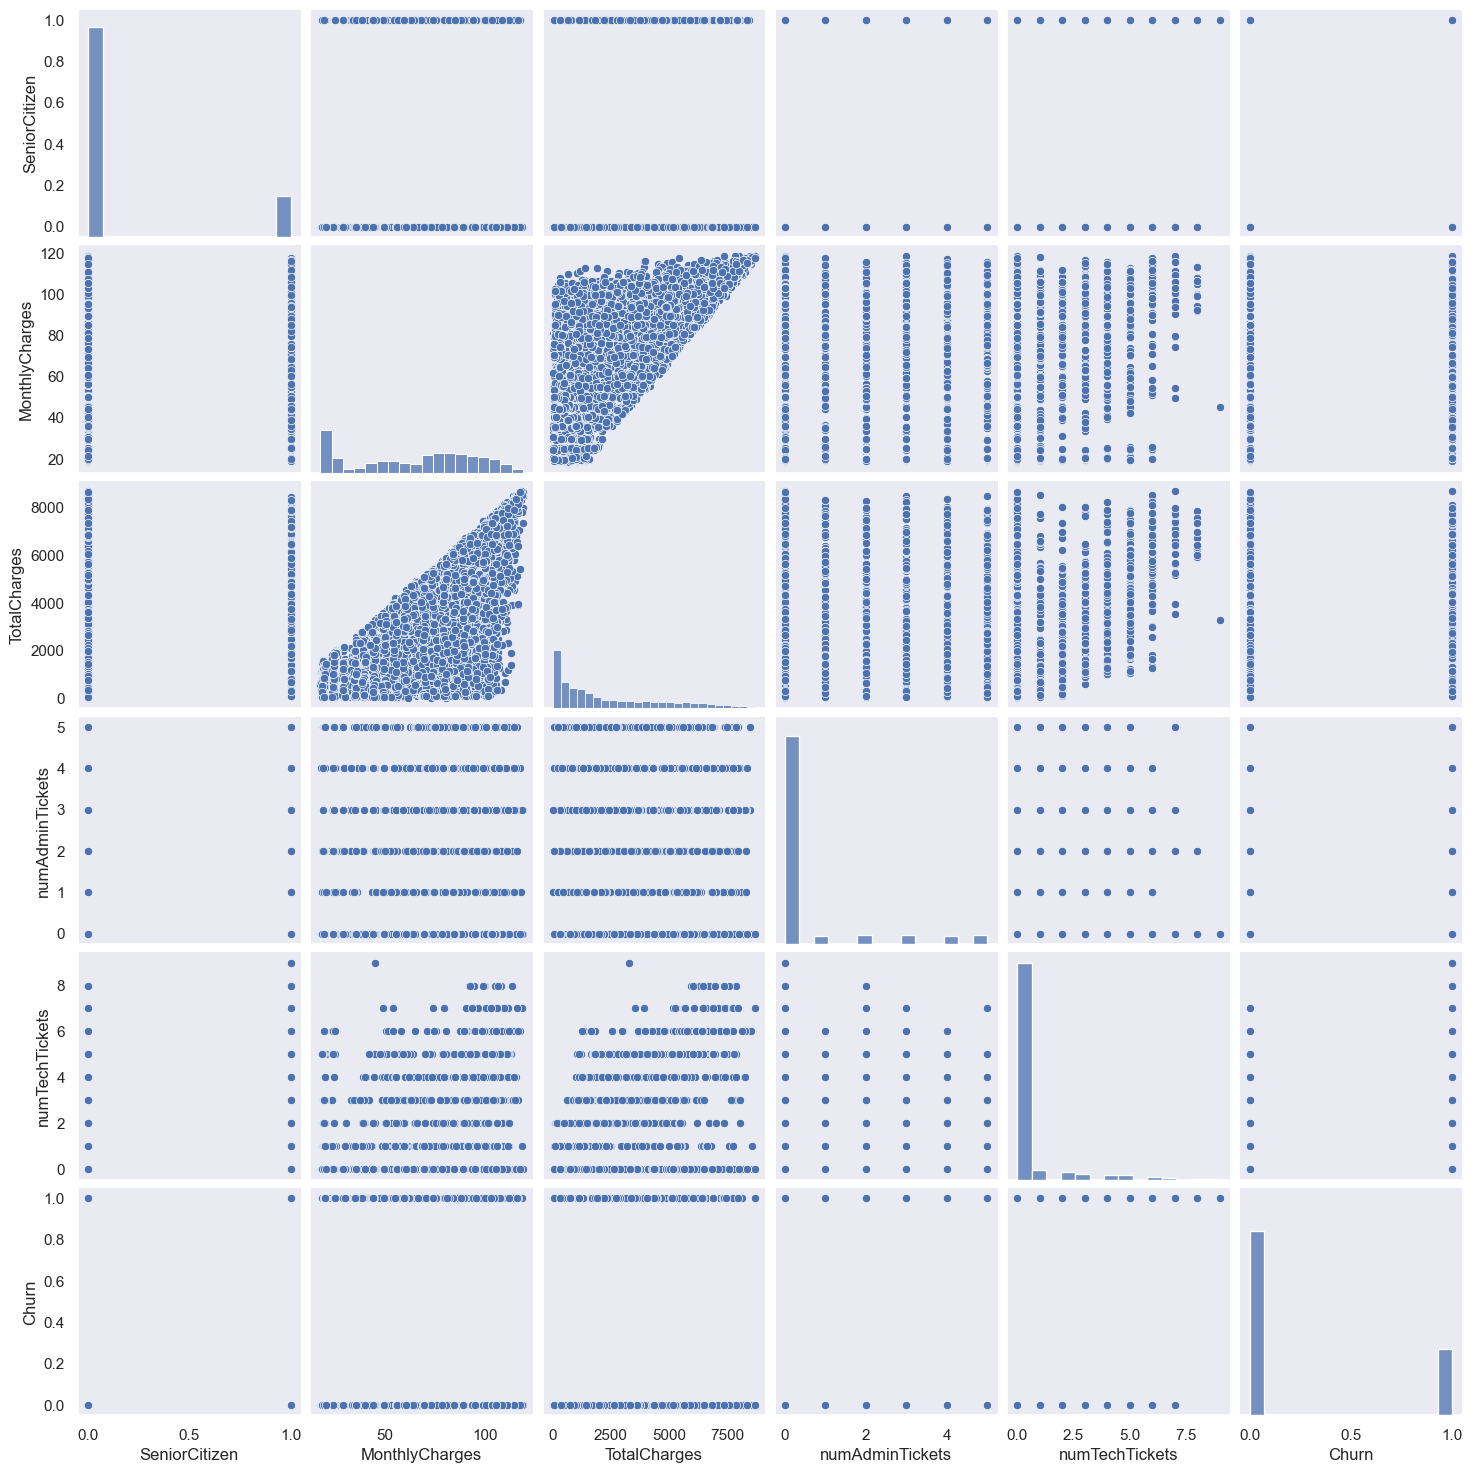

In [25]:
sns.pairplot(df)

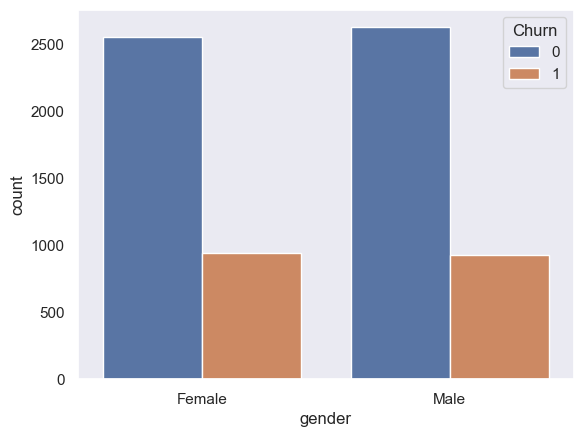

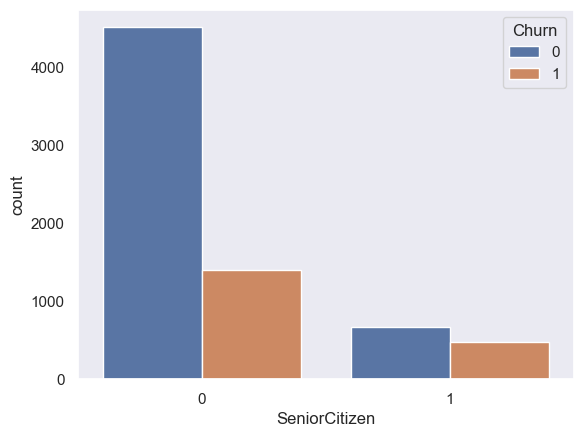

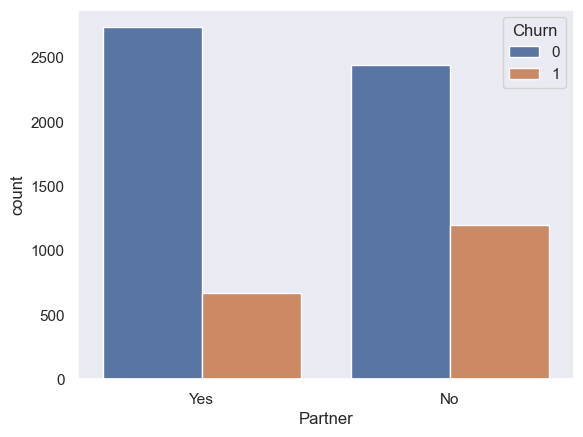

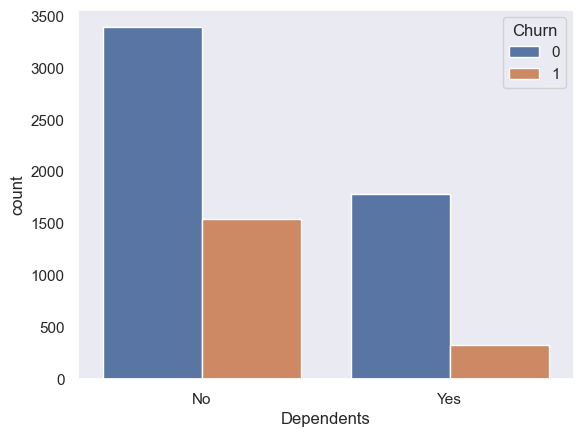

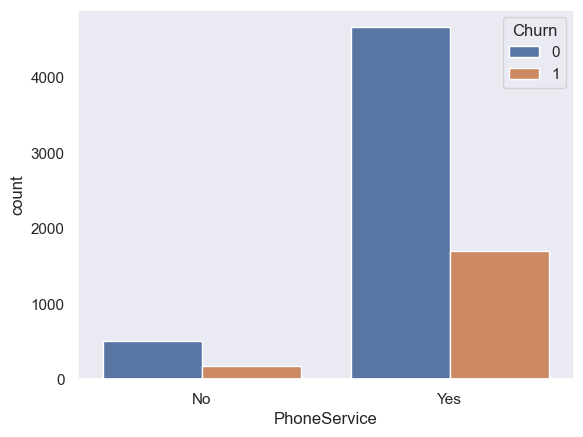

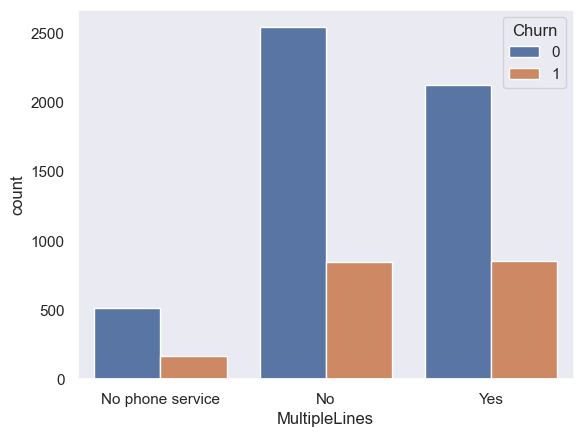

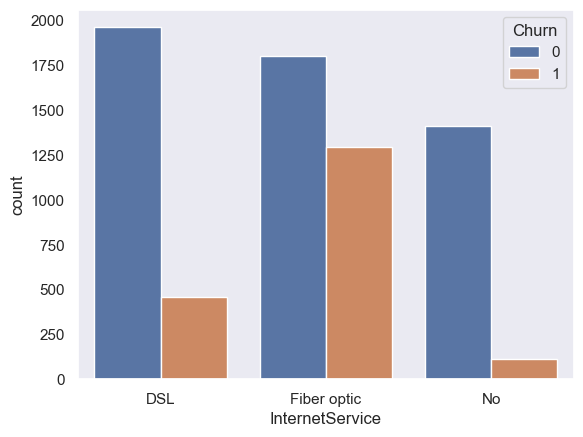

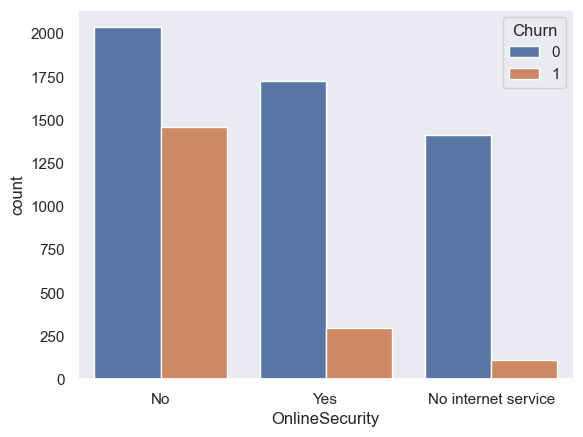

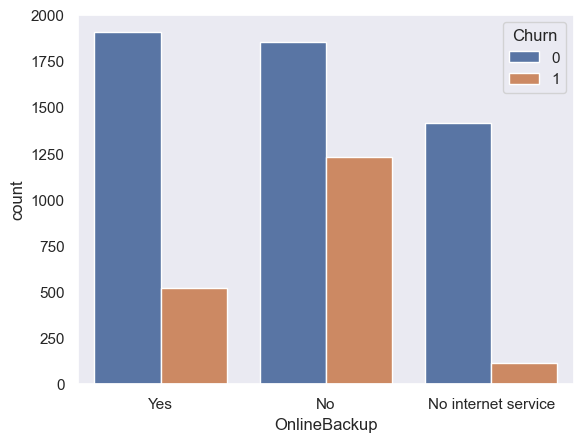

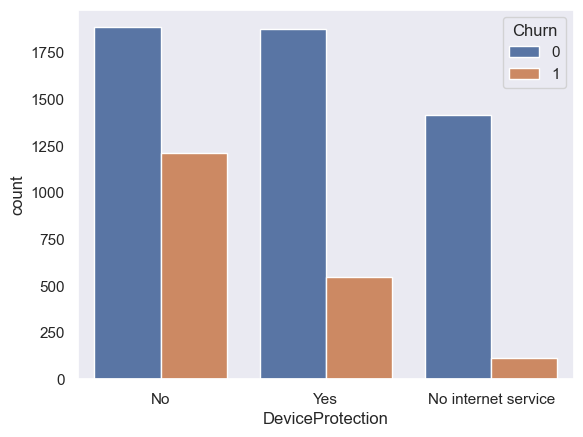

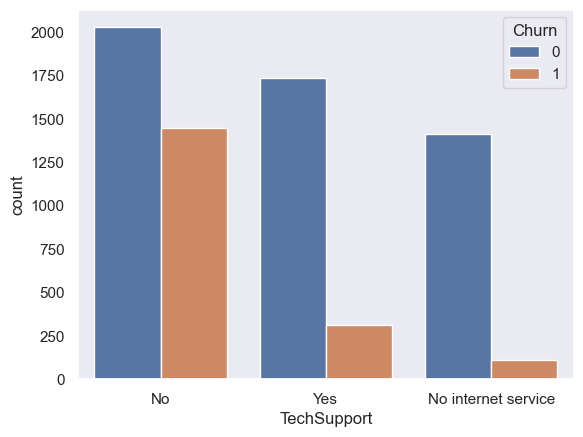

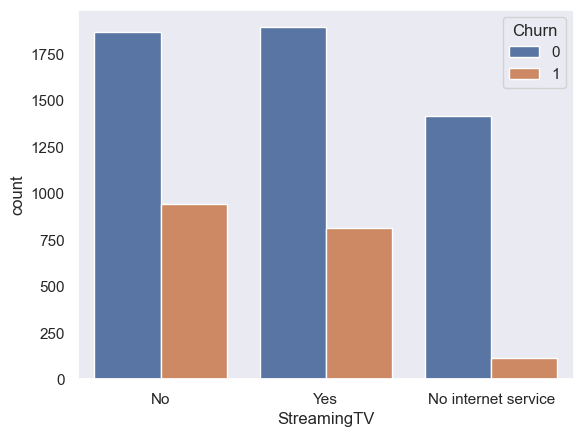

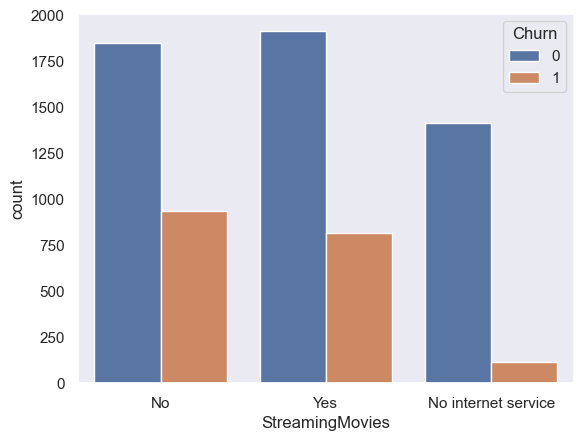

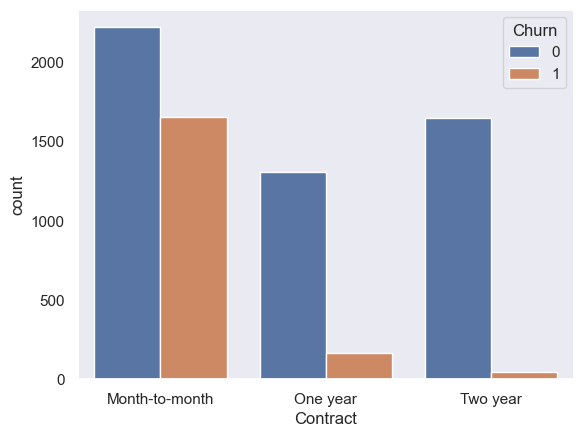

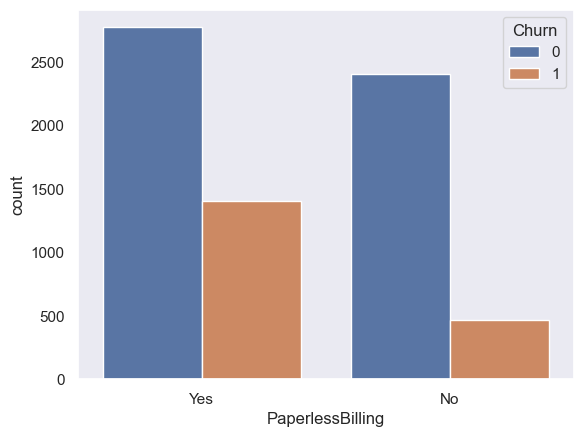

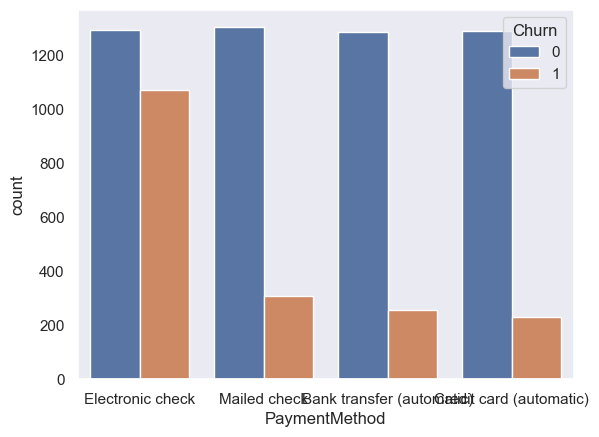

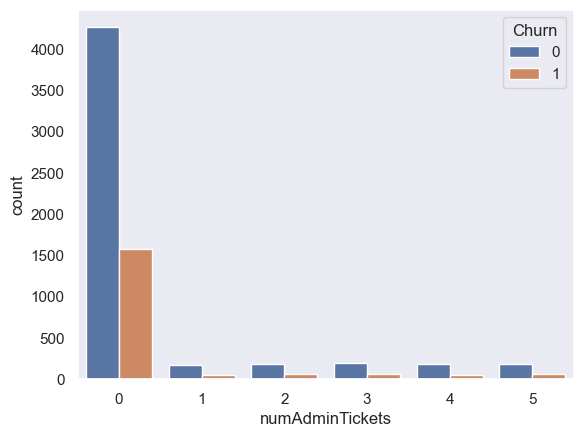

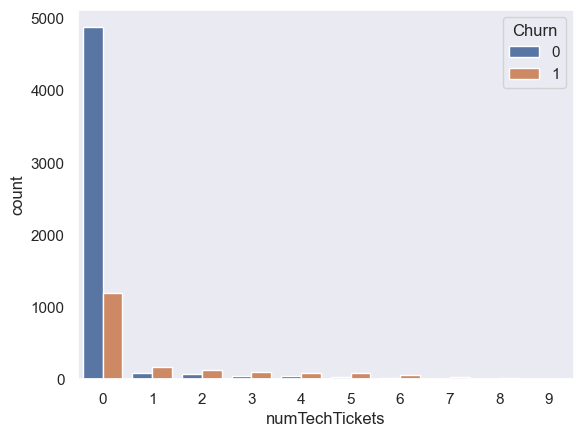

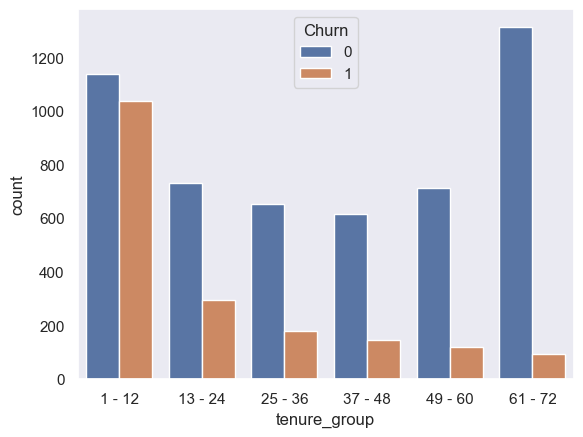

In [26]:
for i, predictor in enumerate(df.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

#### One Hot Encoding 
Converting  the categorical variables into dummy variables

In [27]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,0,0,1,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,0,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,3,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between Monthly Charges and Total Charges

<Figure size 1800x600 with 0 Axes>

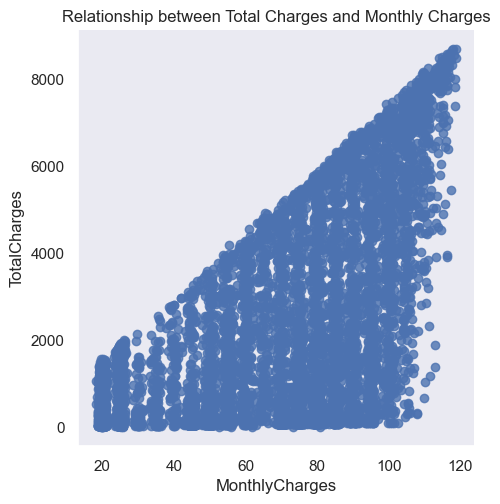

In [28]:
plt.figure(figsize = (18,6))
sns.lmplot(data=df_dummies, x="MonthlyCharges", y="TotalCharges",palette="YlOrBr",fit_reg=False)
plt.title('Relationship between Total Charges and Monthly Charges')
plt.show()

Churn by Monthly Charges and Total Charges

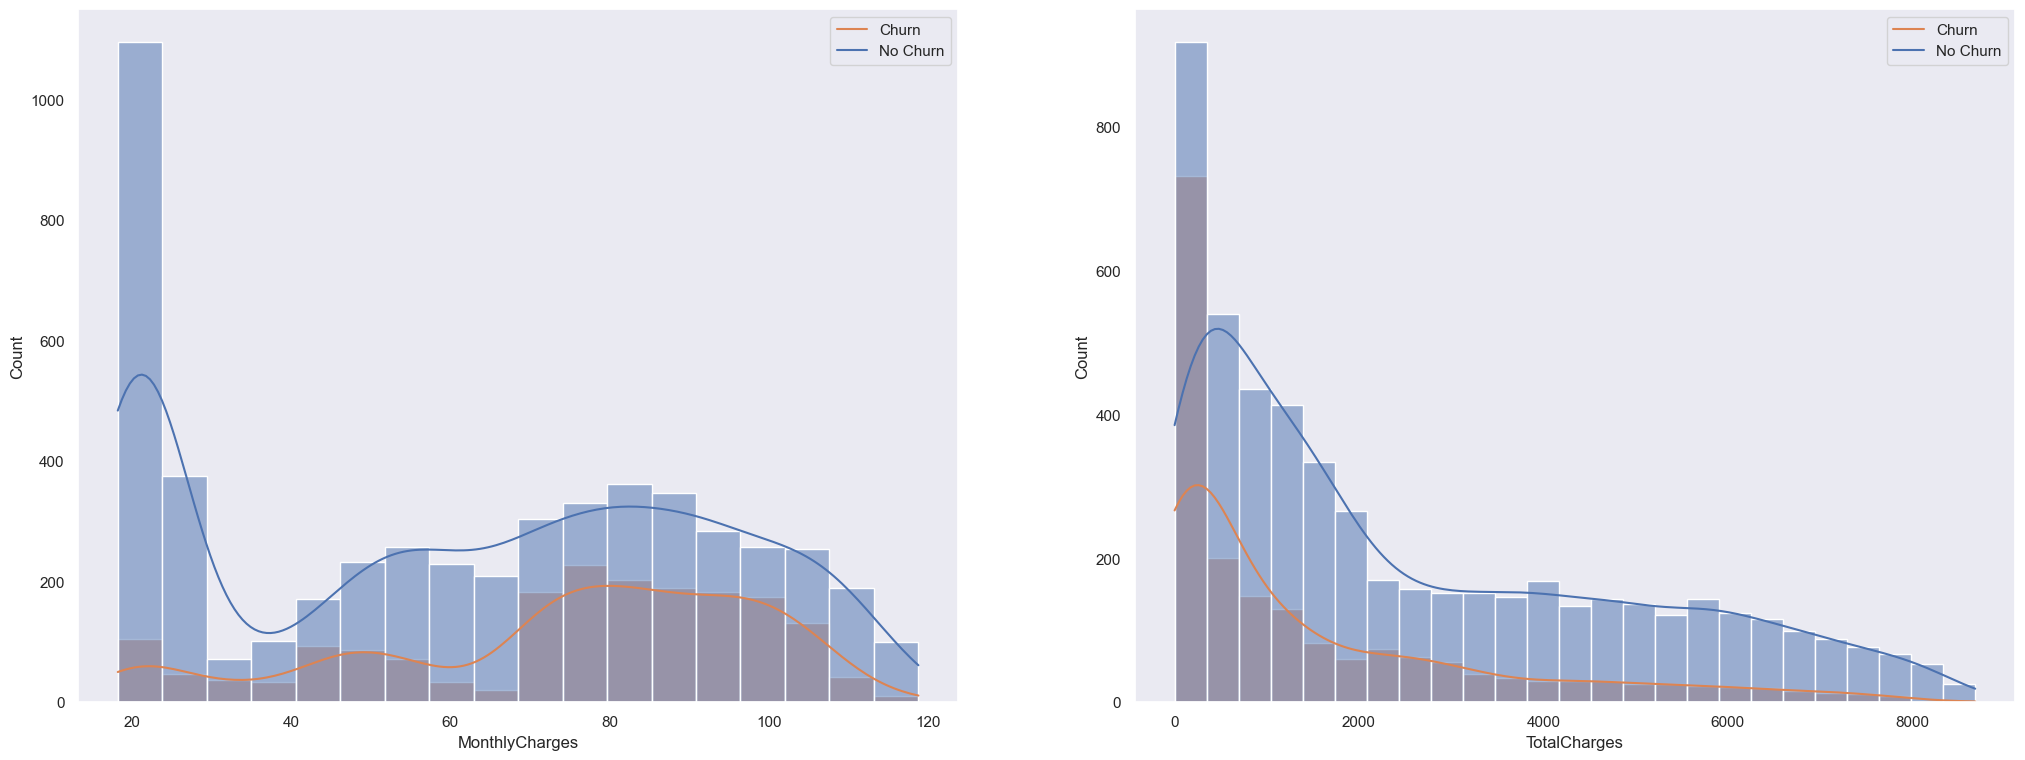

In [29]:
plt.subplots(1,2,figsize=(25,9))
plt.subplot(121)
sns.histplot(data=df_dummies,x='MonthlyCharges',kde=True,hue='Churn')
plt.legend(["Churn","No Churn"],loc='upper right')
plt.subplot(122)
sns.histplot(data=df_dummies,x='TotalCharges',kde=True,hue='Churn')
plt.legend(["Churn","No Churn"],loc='upper right')
plt.show()

##### Insight: 
Churn is high when Monthly Charges are high.

**Surprising insight ** as higher Churn at lower Total Charges

Exploring Monthly Charges and total charges as to why the churn is higher in Low Total Charges

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

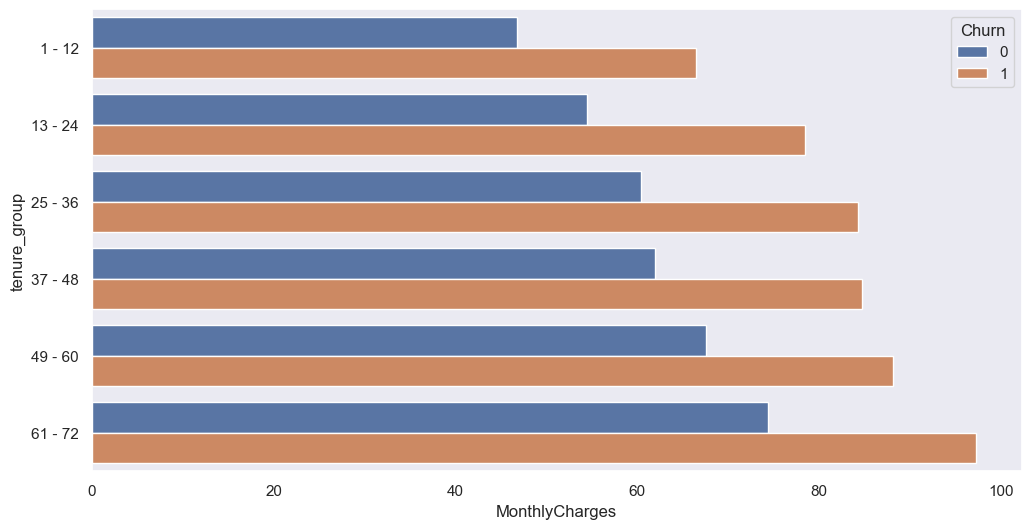

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='MonthlyCharges',y='tenure_group',hue='Churn',errorbar=('ci', False))
plt.show()

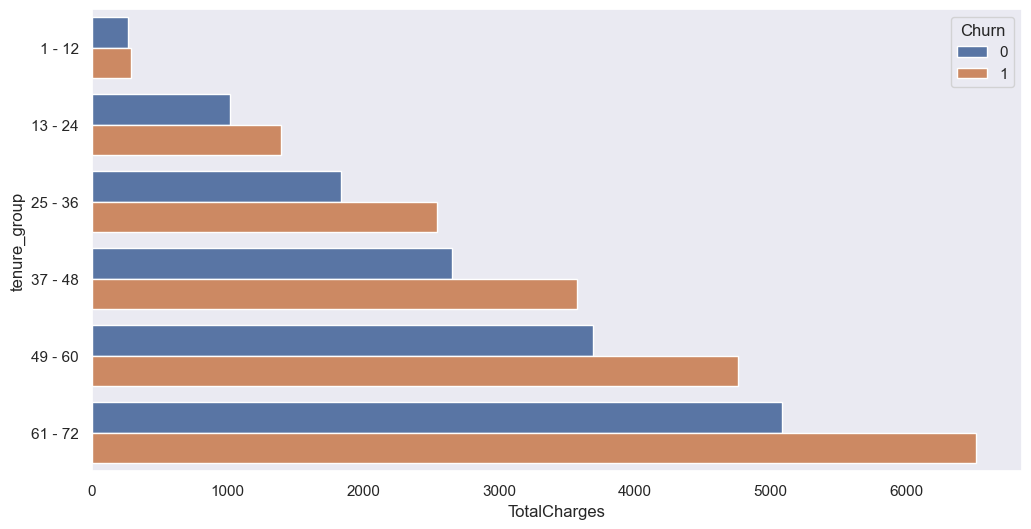

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='TotalCharges',y='tenure_group',hue='Churn',errorbar=('ci', False))
plt.show()

Combining three features i.e., Churn, MonthlyCharges and Tenure_Group presents a clearer picture.
We can see that MonthlyCharges is high for all tenure groups leading to higher monthly charge for lower tenure as well. Hence Higher monthly charges in low tenure is leading to churn rate being higher at low total charges . All these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linked to High Churn.

<AxesSubplot:>

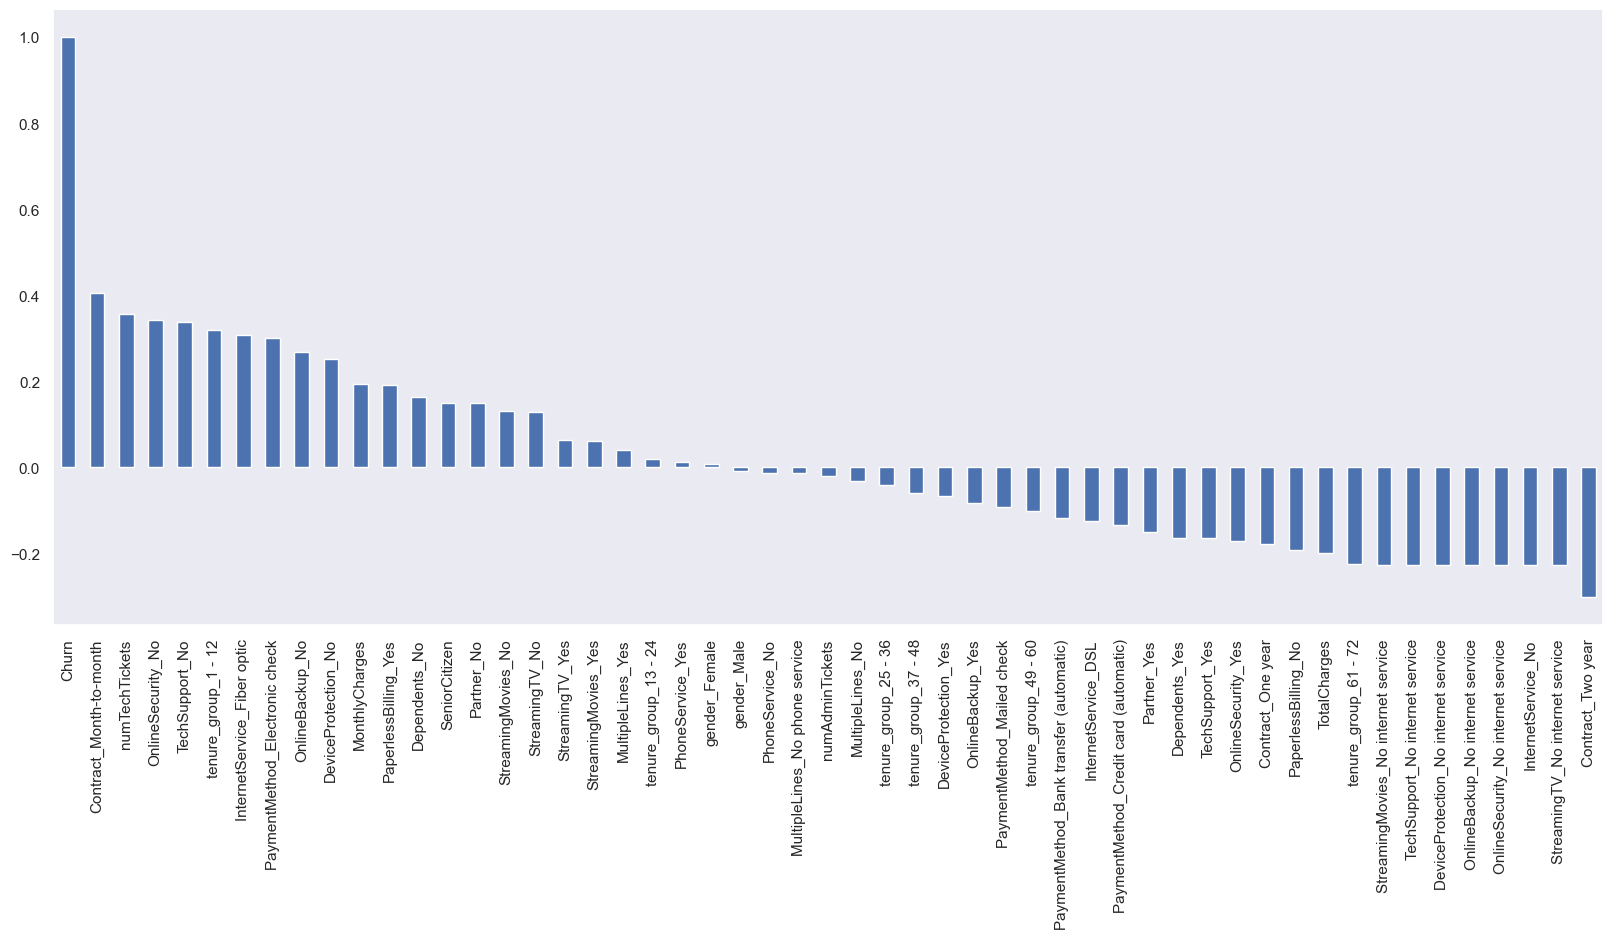

In [33]:
plt.figure(figsize=(20,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Observation:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription, Fibre Optics Internet and Customers paying through electronic checks.

LOW Churn is seen in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

Bi Variate

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   object  
 1   SeniorCitizen     7043 non-null   int64   
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   PhoneService      7043 non-null   object  
 5   MultipleLines     7043 non-null   object  
 6   InternetService   7043 non-null   object  
 7   OnlineSecurity    7043 non-null   object  
 8   OnlineBackup      7043 non-null   object  
 9   DeviceProtection  7043 non-null   object  
 10  TechSupport       7043 non-null   object  
 11  StreamingTV       7043 non-null   object  
 12  StreamingMovies   7043 non-null   object  
 13  Contract          7043 non-null   object  
 14  PaperlessBilling  7043 non-null   object  
 15  PaymentMethod     7043 non-null   object  
 16  MonthlyCharges    7043 n

In [35]:
df_count = df[df['Churn'] == 1]
df_count

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,tenure_group
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,1,1 - 12
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,1,1 - 12
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,0,0,1,1 - 12
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,0,2,1,25 - 36
13,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,...,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,5,4,1,49 - 60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,Male,0,No,No,Yes,No,DSL,No,No,No,...,No,One year,Yes,Electronic check,59.80,727.80,0,0,1,1 - 12
7026,Female,0,No,No,Yes,No,DSL,No,No,No,...,No,Month-to-month,Yes,Bank transfer (automatic),44.20,403.35,4,0,1,1 - 12
7032,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,...,No,Month-to-month,Yes,Electronic check,75.75,75.75,0,0,1,1 - 12
7034,Female,0,No,No,Yes,Yes,Fiber optic,Yes,Yes,Yes,...,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,0,7,1,61 - 72


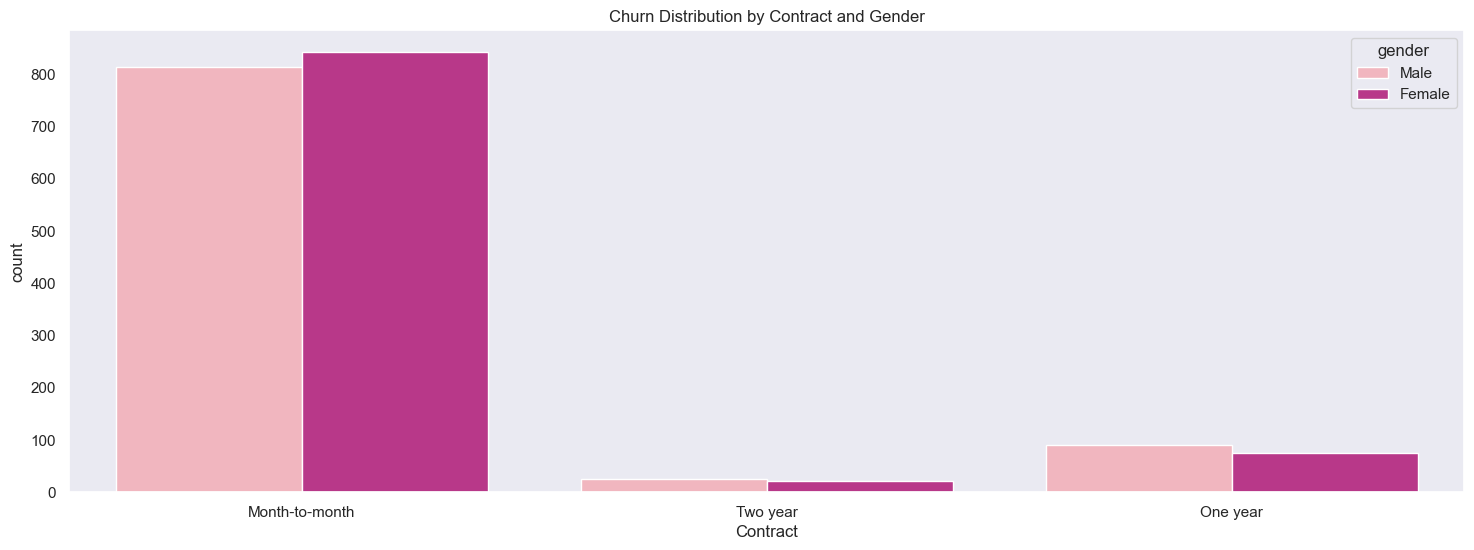

In [36]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='Contract', hue='gender', palette='RdPu')
plt.title('Churn Distribution by Contract and Gender')
plt.show()

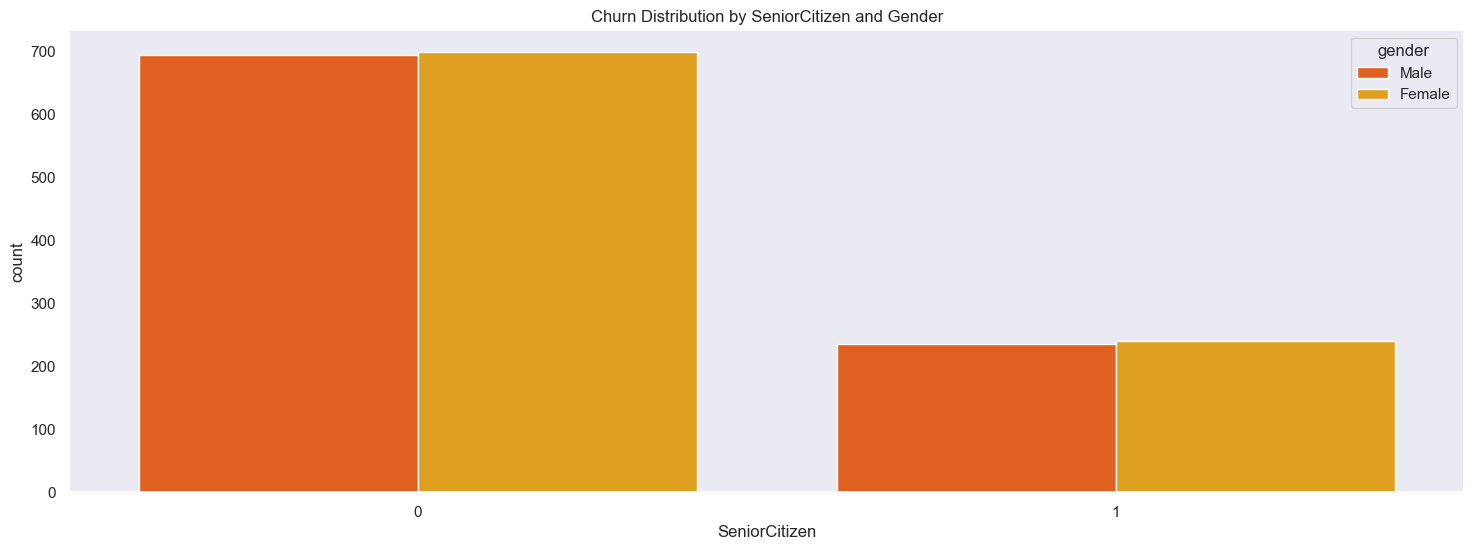

In [37]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='SeniorCitizen', hue='gender', palette='autumn')
plt.title('Churn Distribution by SeniorCitizen and Gender')
plt.show()

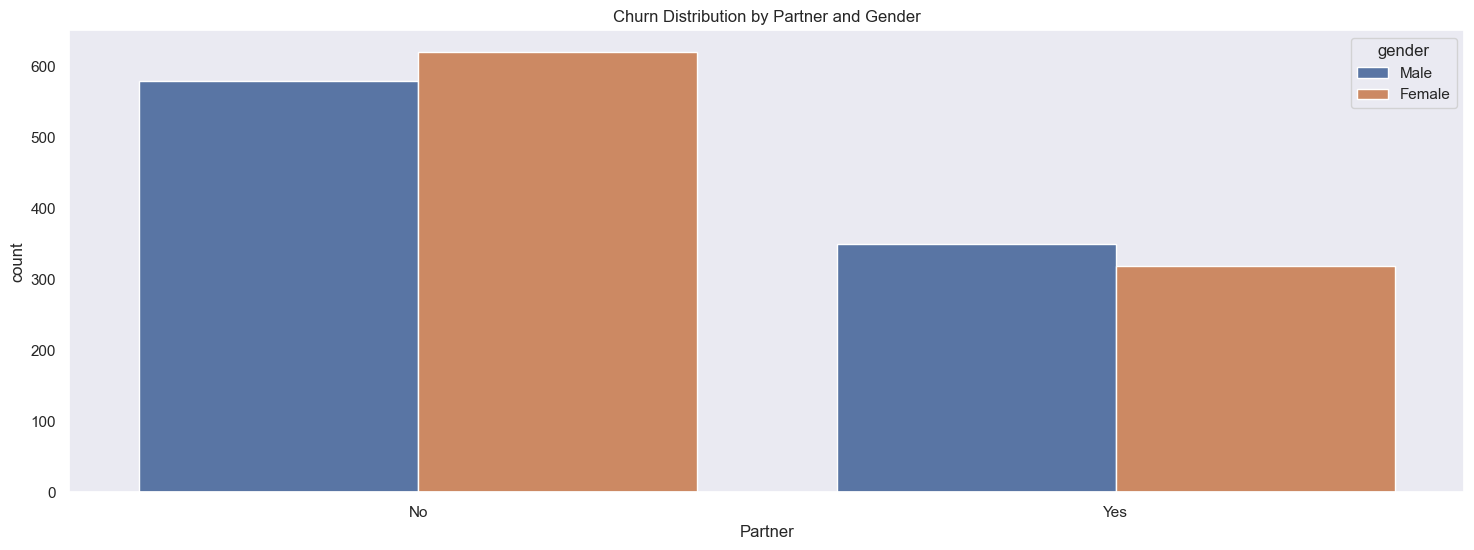

In [38]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='Partner', hue='gender')
plt.title('Churn Distribution by Partner and Gender')
plt.show()

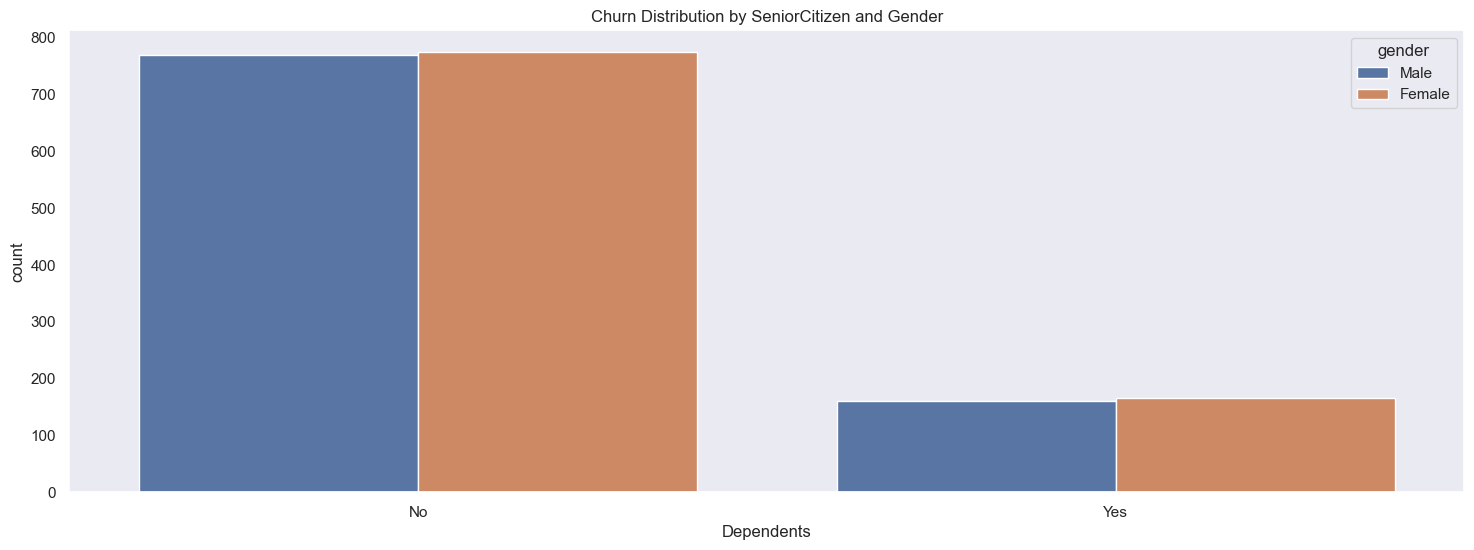

In [39]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='Dependents', hue='gender')
plt.title('Churn Distribution by SeniorCitizen and Gender')
plt.show()

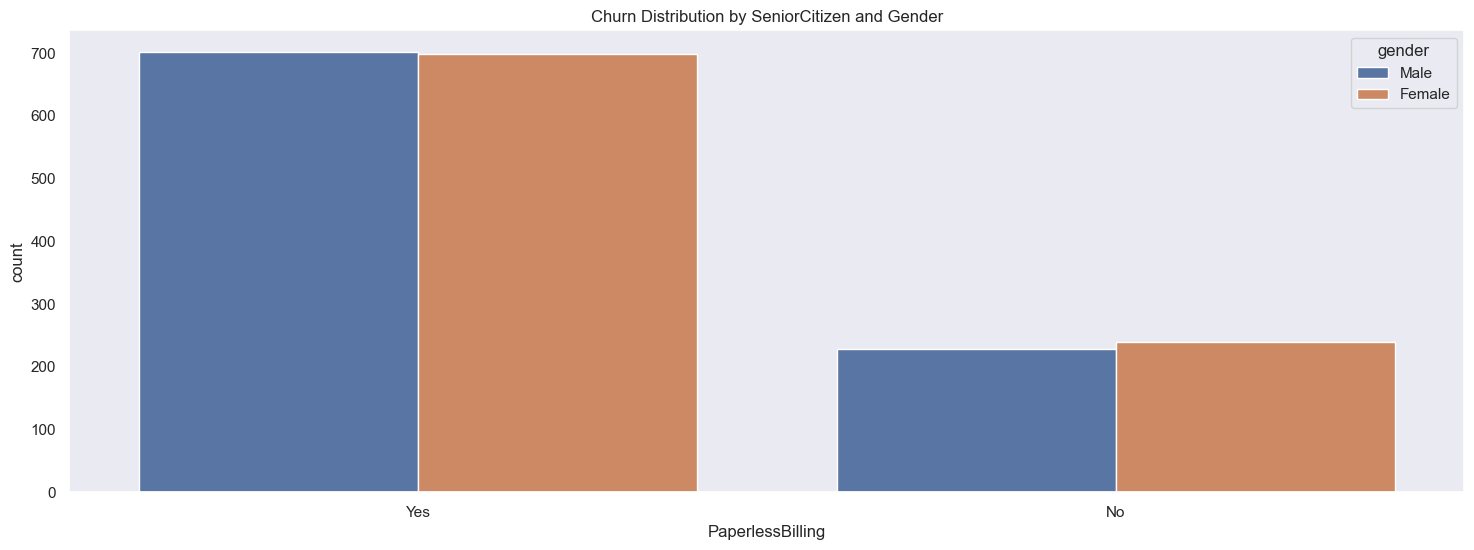

In [40]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='PaperlessBilling', hue='gender')
plt.title('Churn Distribution by SeniorCitizen and Gender')
plt.show()

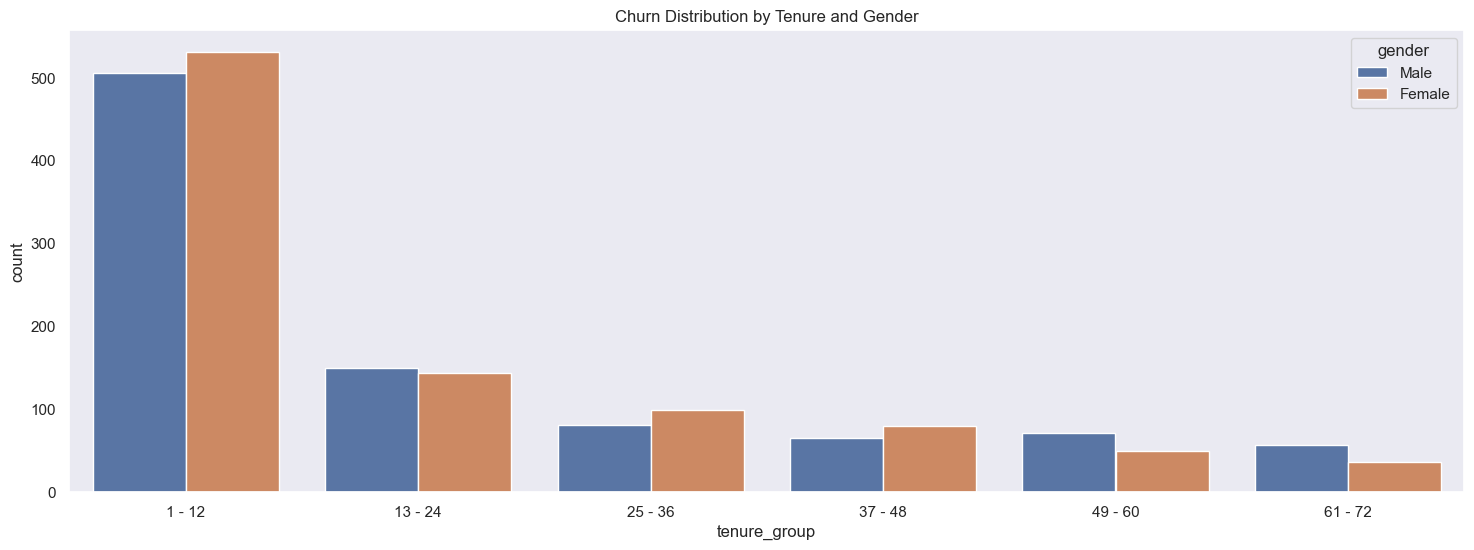

In [41]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='tenure_group', hue='gender')
plt.title('Churn Distribution by Tenure and Gender')
plt.show()

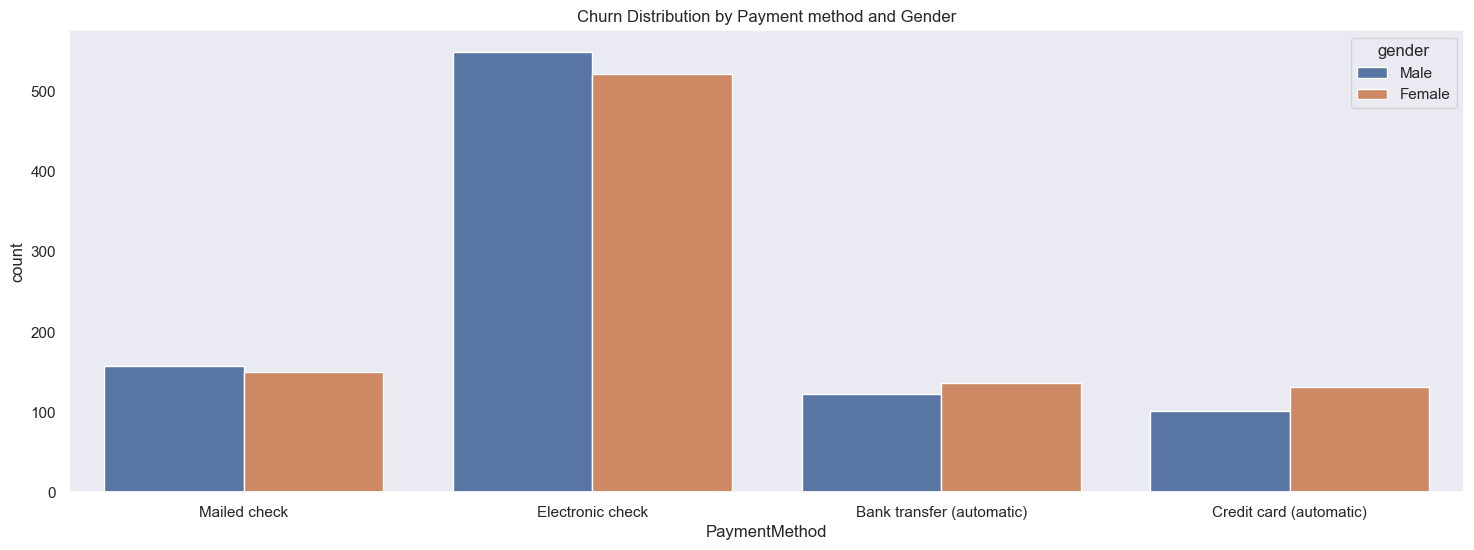

In [42]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='PaymentMethod', hue='gender')
plt.title('Churn Distribution by Payment method and Gender')
plt.show()

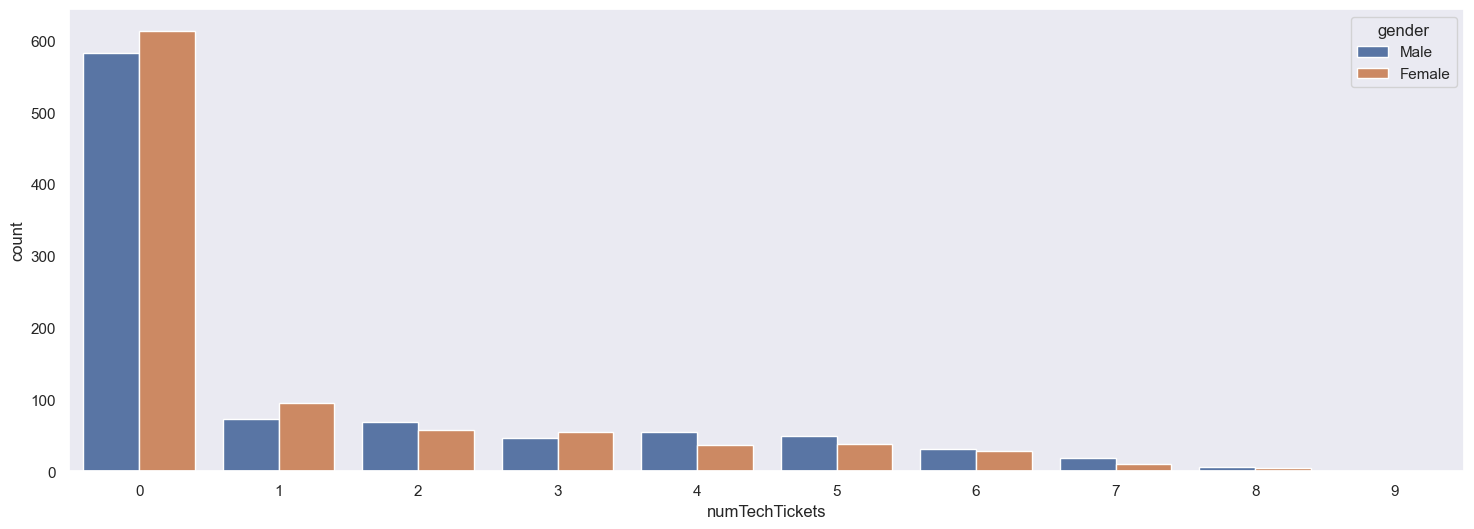

In [43]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count, x='numTechTickets',hue='gender')
plt.show()

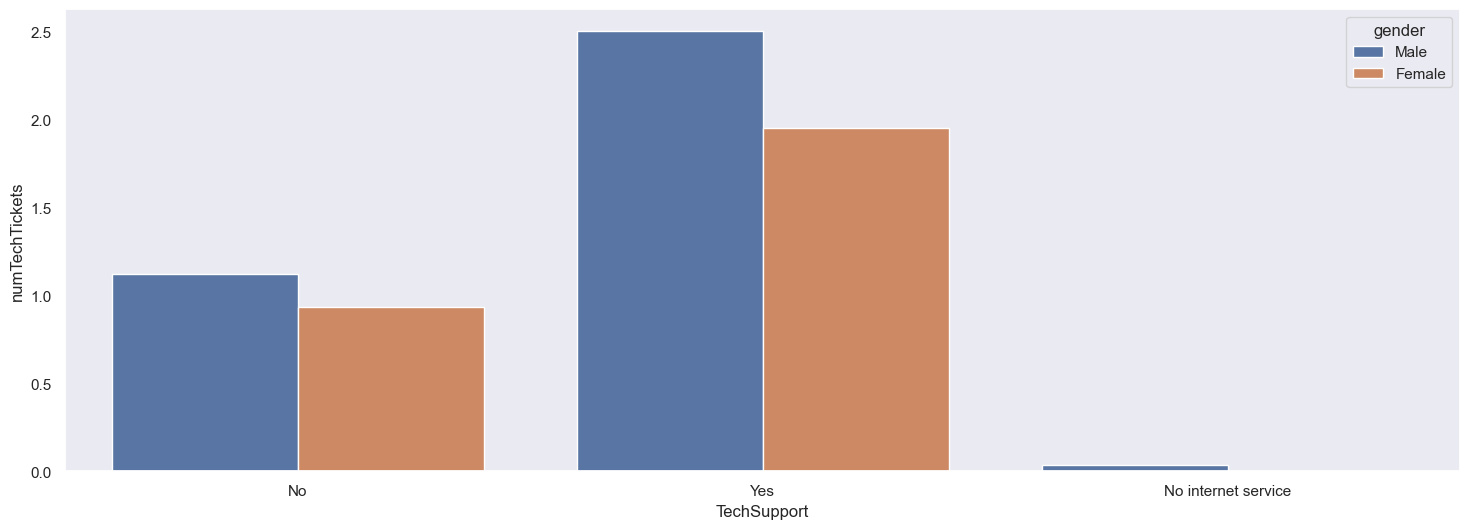

In [44]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.barplot(data=df_count, y='numTechTickets',x='TechSupport',hue='gender', errorbar=('ci', False))
plt.show()

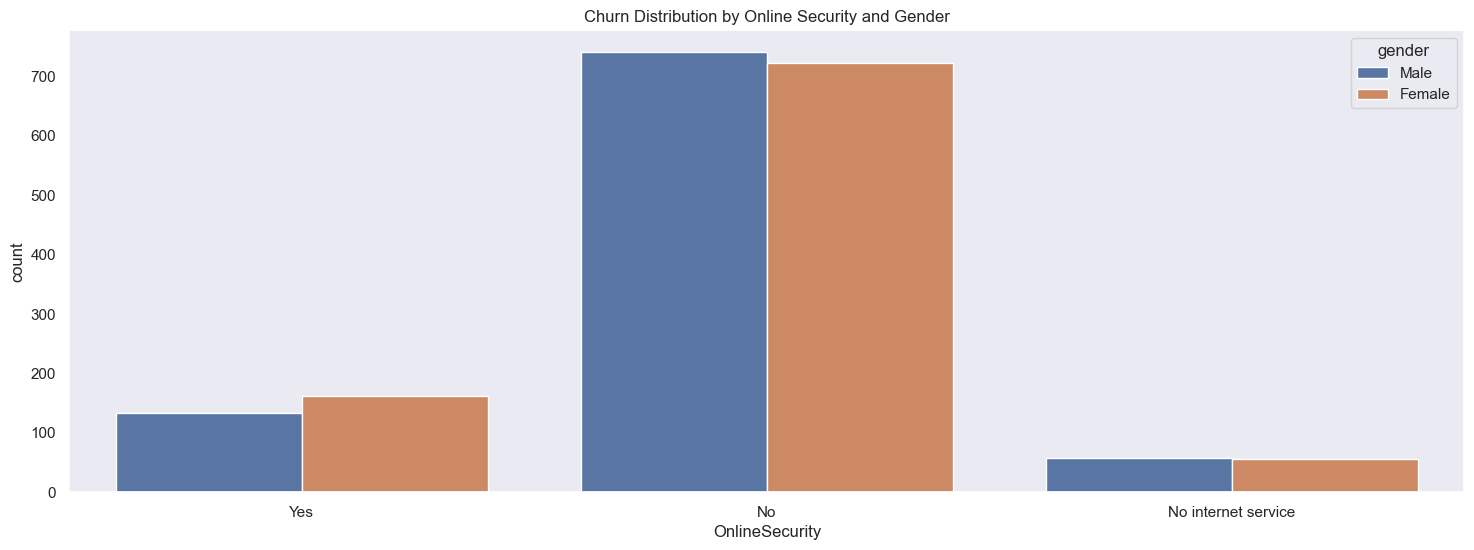

In [45]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='OnlineSecurity', hue='gender')
plt.title('Churn Distribution by Online Security and Gender')
plt.show()

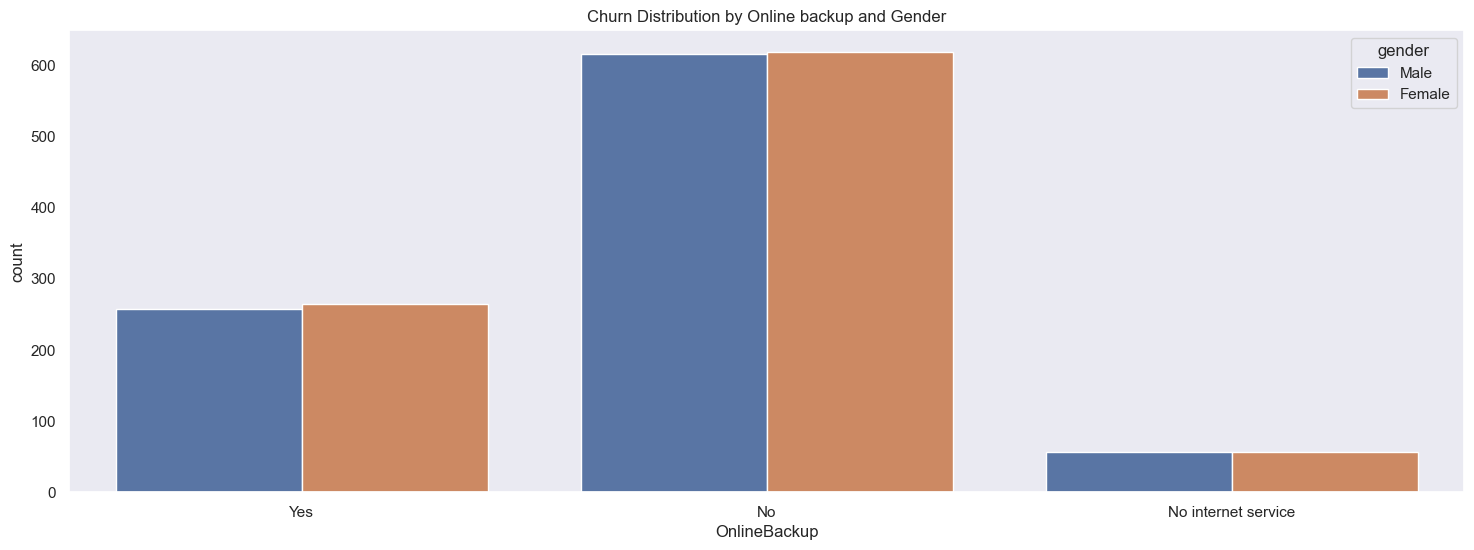

In [46]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='OnlineBackup', hue='gender')
plt.title('Churn Distribution by Online backup and Gender')
plt.show()

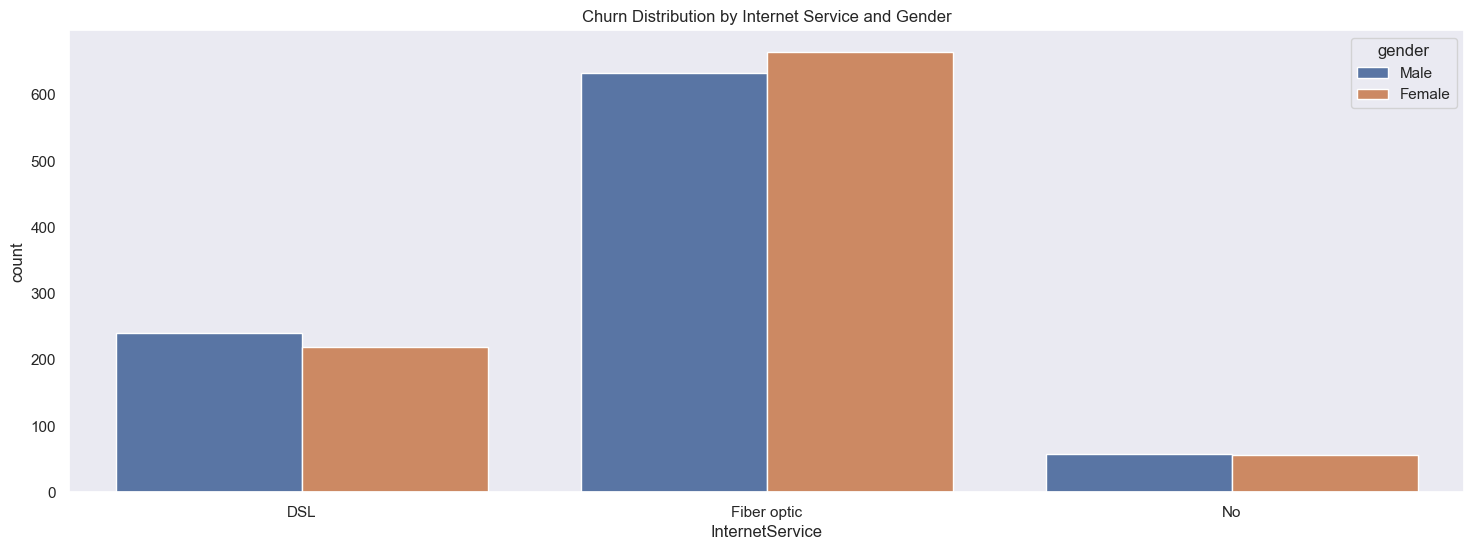

In [47]:
plt.figure(figsize=(18, 6))
sns.set_theme(style="dark")
sns.countplot(data=df_count,x='InternetService', hue='gender')
plt.title('Churn Distribution by Internet Service and Gender')
plt.show()

#### CONCLUSION:
These are some of the quick insights from this exercise:

1.Electronic check medium are the highest churners in Male and credit card payment has more female churner.

2.Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

3.No Online security,and No Online Backup category are high churners. 

4. Customers with no tech tickets are high churners considering that people with no tech support are also high churners but The chart shows an inverse co - relation between tech support and numtechtickets. Customers who use tech support frequently (indicated by higher ticket counts) are more likely to churn, which suggests that higher engagement with support may indicate unresolved or frequent issues.
Providing tech support generally reduces churn, but only if customers do not require frequent support interactions (as shown by high ticket counts).

5.Non senior Citizens are high churners

6. People with tenure less than 12 are high churners.

In [48]:
df_dummies.to_csv('tel_churn.csv')